# **Tensorflow implementation for CVPR2020 paper “Learning to Cartoonize Using White-box Cartoon Representations”.**

[Learning to Cartoonize Using White-box Cartoon Representations](https://openaccess.thecvf.com/content_CVPR_2020/papers/Wang_Learning_to_Cartoonize_Using_White-Box_Cartoon_Representations_CVPR_2020_paper.pdf) (CVPR 2020) paper by Xinrui Wang and Jinze Yu.



In [1]:
!git clone https://github.com/SystemErrorWang/White-box-Cartoonization.git
# !pip install --upgrade tf_slim
!pip install wget --quiet

Cloning into 'White-box-Cartoonization'...
remote: Enumerating objects: 202, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 202 (delta 0), reused 0 (delta 0), pack-reused 199
Receiving objects: 100% (202/202), 44.61 MiB | 34.06 MiB/s, done.
Resolving deltas: 100% (74/74), done.


In [ ]:
!pip install tensorflow==1.13.1

In [3]:
%cd White-box-Cartoonization/test_code

/content/White-box-Cartoonization/test_code


**You can use image url or upload local image**

In [4]:
# fname = None
fname = 'https://ic.pics.livejournal.com/mostovoy/28566193/1224276/1224276_original.jpg' 
# fname = "https://raw.githubusercontent.com/senya-ashukha/senya-ashukha.github.io/master/images/alex.jpg"

In [5]:
from shutil import copyfile
import shutil
import os
import wget
import matplotlib.pyplot as plt
from google.colab import files

# inference

In [13]:
def cartoonize_image(fname):
  if fname is None:
    from google.colab import files
    files = files.upload()
    fname = list(files.keys())[0]
  else:
    fname = wget.download(fname)


  shutil.rmtree('./test_images', ignore_errors=True)
  ! mkdir test_images

  copyfile(fname, f'./test_images/{fname}')
  os.remove(fname)
  os.system("python cartoonize.py")
  load_folder = './test_images'
  save_folder = './cartoonized_images'

  source_image = plt.imread(f'./test_images/{fname}')
  cartoonized_image = plt.imread(f'./cartoonized_images/{fname}')

  fig, ax = plt.subplots(1, 2, figsize=(15, 5))
  ax[0].imshow(source_image)
  ax[0].set_title('Source image')
  ax[1].imshow(cartoonized_image)
  ax[1].set_title('Cartoonized image')
  [x.set_axis_off() for x in ax]
  plt.show()

# show result

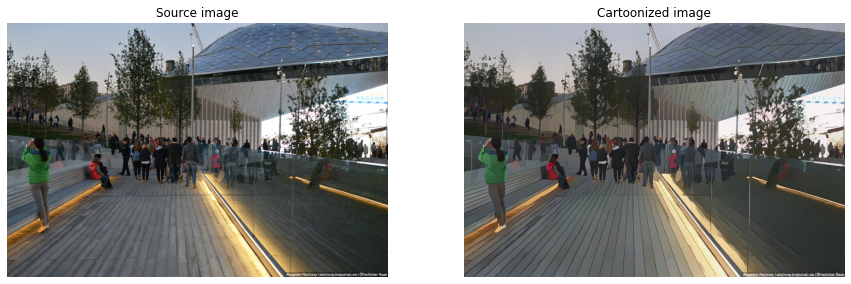

In [14]:
cartoonize_image(fname)

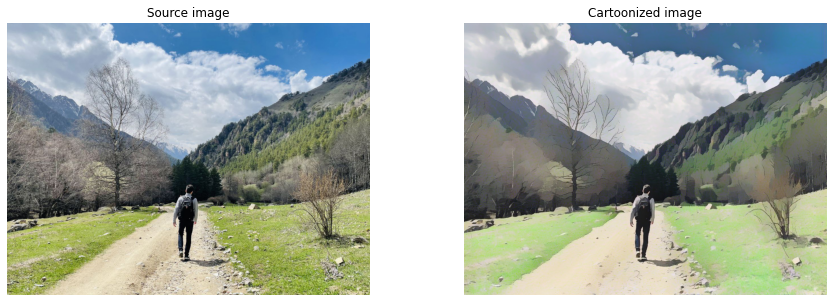

In [15]:
fname = "https://raw.githubusercontent.com/senya-ashukha/senya-ashukha.github.io/master/images/alex.jpg"
cartoonize_image(fname)

# Download the result

In [ ]:

zip_filename = 'result.zip'
if os.path.exists(zip_filename):
  os.remove(zip_filename)
os.system(f"zip -r -j {zip_filename} cartoonized_images/*")
files.download(zip_filename)